In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=["target","id","date","flag","user","text"],encoding="latin-1")

In [3]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.shape

(1600000, 6)

In [5]:
data.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

target 0->Negative
target 4->Positive

In [6]:
data.target.value_counts()

,count
target,
0,800000
4,800000


In [7]:
data.dtypes

,0
target,int64
id,int64
date,object
flag,object
user,object
text,object


In [8]:
data.replace({"target":{4:1}},inplace=True)

In [9]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
data.target.value_counts()

,count
target,
0,800000
1,800000


In [11]:
data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [12]:
data.flag.value_counts()

,count
flag,
NO_QUERY,1600000


In [13]:
data["text"]

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
...,...
1599995,Just woke up. Having no school is the best fee...
1599996,TheWDB.com - Very cool to hear old Walt interv...
1599997,Are you ready for your MoJo Makeover? Ask me f...
1599998,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
def extract_text(text):
  review=re.sub('[^a-zA-Z]'," ",text)
  review=review.lower()
  review=review.strip()
  return review

data["extract_text"]=data["text"].apply(extract_text)

In [15]:
data.extract_text

,extract_text
0,switchfoot http twitpic com y zl awww th...
1,is upset that he can t update his facebook by ...
2,kenichan i dived many times for the ball mana...
3,my whole body feels itchy and like its on fire
4,nationwideclass no it s not behaving at all ...
...,...
1599995,just woke up having no school is the best fee...
1599996,thewdb com very cool to hear old walt interv...
1599997,are you ready for your mojo makeover ask me f...
1599998,happy th birthday to my boo of alll time ...


In [16]:
custom_stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should','d', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', 'couldn','hadn',
    'hasn', 'haven', 'ma', 'mightn', 'mustn', 'needn', 'shan',
    'shouldn', 'wasn', 'weren', 'wouldn'
}


In [17]:
lemmatize=WordNetLemmatizer()
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
def lemmatize_text(text):
  words=nltk.word_tokenize(text)
  lemmatize_word=[]

  for word in words:
    if(word not in set(custom_stop_words)):
      lemmatize_word.append(lemmatize.lemmatize(word))
  text=" ".join(lemmatize_word)
  return text

data["lemmatize_text"]=data["extract_text"].apply(lemmatize_text)

In [19]:
data.lemmatize_text

,lemmatize_text
0,switchfoot http twitpic com zl awww bummer sho...
1,upset update facebook texting might cry result...
2,kenichan dived many time ball managed save res...
3,whole body feel itchy like fire
4,nationwideclass not behaving mad see
...,...
1599995,woke school best feeling ever
1599996,thewdb com cool hear old walt interview http b...
1599997,ready mojo makeover ask detail
1599998,happy th birthday boo alll time tupac amaru sh...


In [20]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['lemmatize_text'])

# Get the vocabulary size
voc_size = len(tokenizer.word_index) + 1  # +1 for padding token
print(f"Vocabulary Size: {voc_size}")

Vocabulary Size: 573671


In [21]:
from tensorflow.keras.preprocessing.text import one_hot
vocal_size=20000
onehot_repr=[one_hot(words,vocal_size)for words in data["lemmatize_text"]]


In [22]:
print(data.lemmatize_text[0])
onehot_repr[0]

switchfoot http twitpic com zl awww bummer shoulda got david carr third day


[11164,
 6687,
 12672,
 9692,
 786,
 7887,
 1062,
 13792,
 4004,
 6644,
 16177,
 13126,
 1842]

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
data['sentence_length'] = data['lemmatize_text'].apply(lambda x: len(x.split(" ")))


max_sentence_len=data["sentence_length"].max()
print(max_sentence_len)

50


In [25]:
vocal_size=5000
embedded_docs=pad_sequences(onehot_repr,padding="pre",maxlen=max_sentence_len)
print(embedded_docs)

[[    0     0     0 ... 16177 13126  1842]
 [    0     0     0 ...  3918  9384 11861]
 [    0     0     0 ...  2317   784 12542]
 ...
 [    0     0     0 ... 16138 11692  3256]
 [    0     0     0 ...  2620 19864 12509]
 [    0     0     0 ...   287 12949 15735]]


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=300, input_length=50))
model.add(LSTM(100, return_sequences=False))  # Only output the last hidden state
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final output shape will be (32, 1)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
x=embedded_docs
y=data["target"]

In [29]:
x

array([[    0,     0,     0, ..., 16177, 13126,  1842],
       [    0,     0,     0, ...,  3918,  9384, 11861],
       [    0,     0,     0, ...,  2317,   784, 12542],
       ...,
       [    0,     0,     0, ..., 16138, 11692,  3256],
       [    0,     0,     0, ...,  2620, 19864, 12509],
       [    0,     0,     0, ...,   287, 12949, 15735]], dtype=int32)

In [30]:

y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1599995,1
1599996,1
1599997,1
1599998,1


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test))


Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 6026s 151ms/step - accuracy: 0.7651 - loss: 0.4811 - val_accuracy: 0.7896 - val_loss: 0.4444
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 6239s 156ms/step - accuracy: 0.8057 - loss: 0.4183 - val_accuracy: 0.7913 - val_loss: 0.4423
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 6043s 150ms/step - accuracy: 0.8223 - loss: 0.3895 - val_accuracy: 0.7894 - val_loss: 0.4497
Epoch 4/5
 9769/40000 ━━━━━━━━━━━━━━━━━━━━ 1:11:24 142ms/step - accuracy: 0.8425 - loss: 0.3556

KeyboardInterrupt: 

In [35]:
model.save("sentiment_model.h5")

In [36]:
model.save("sentiment_model.keras")

In [38]:
from tensorflow.keras.models import load_model

model = load_model('sentiment_model.h5')


In [40]:
y_pred=model.predict(x_test)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 330s 33ms/step


In [47]:
y_pred

array([[0.46656778],
       [0.93319523],
       [0.63705856],
       ...,
       [0.9907884 ],
       [0.3280819 ],
       [0.2970721 ]], dtype=float32)

In [49]:

y_pred_classes = (y_pred > 0.5).astype(int)
print(y_pred_classes)


[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [51]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_classes))

0.783215625


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_classes)

array([[125203,  34291],
       [ 35080, 125426]])

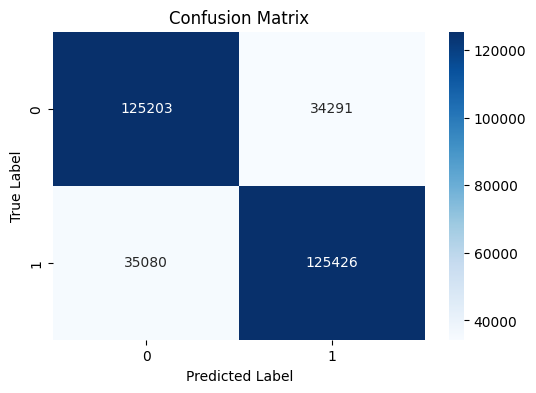

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [75]:
text="Just had an amazing experience at the new café in town! The atmosphere was cozy, and the coffee was absolutely perfect. Highly recommend it to everyone!"

In [76]:
def extract_text(text):
  review=re.sub('[^a-zA-Z]'," ",text)
  review=review.lower()
  review=review.strip()
  return review

text=extract_text(text)

In [77]:
text

'just had an amazing experience at the new caf  in town  the atmosphere was cozy  and the coffee was absolutely perfect  highly recommend it to everyone'

In [78]:
def lemmatize_text(text):
  words=nltk.word_tokenize(text)
  lemmatize_word=[]

  for word in words:
    if(word not in set(custom_stop_words)):
      lemmatize_word.append(lemmatize.lemmatize(word))
  text=" ".join(lemmatize_word)
  return text

text=lemmatize_text(text)


In [79]:
text

'amazing experience new caf town atmosphere cozy coffee absolutely perfect highly recommend everyone'

In [80]:
from tensorflow.keras.preprocessing.text import one_hot
vocal_size=20000
onehot_repr_test=[one_hot(text,vocal_size)]

In [81]:
onehot_repr_test

[[10007,
  6117,
  2590,
  8130,
  12484,
  9357,
  11068,
  413,
  3776,
  17878,
  10926,
  19872,
  6856]]

In [82]:
vocal_size=5000
embedded_docs_test=pad_sequences(onehot_repr_test,padding="pre",maxlen=max_sentence_len)
print(embedded_docs_test)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0 10007  6117  2590  8130 12484  9357 11068   413  3776 17878 10926
  19872  6856]]


In [83]:

predictions = model.predict(embedded_docs_test)

sentiment = (predictions > 0.5).astype(int)
if sentiment == 1:
    print("Positive")
else:
    print("Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Positive
